#### 데이터 1 : 인위적으로 만든 이진 분류 데이터셋

In [26]:
import warnings
warnings.filterwarnings(action='ignore')

from IPython.display import display
import numpy as np
import pandas as pd
import mglearn
from sklearn.datasets import make_blobs

In [2]:
import platform
import matplotlib.pyplot as plt
%matplotlib inline

path="c:/Windows/Fonts/malgun.ttf"

from matplotlib import font_manager, rc
if platform.system()=='Darwin':
    rc('font',family='AppleGothic')
elif platform.system()=='Windows':
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown')
plt.rcParams['axes.unicode_minus']=False

C:\Users\nayoung\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


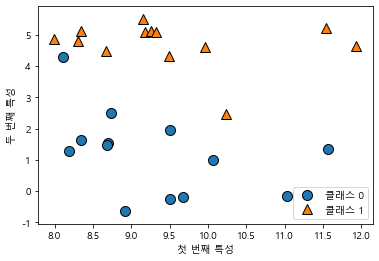

In [3]:
X, y = mglearn.datasets.make_forge()  #make_blobs으로 대체해야하는 듯

mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.legend(["클래스 0","클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, '타깃')

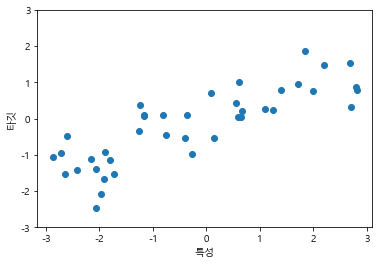

In [4]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

#### 데이터 2 : 위스콘신 유방암 데이터셋
* 양성과 악성으로 레이블되어 있고, 조직 데이터를 기반으로 종양이 악성인지를 예측

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n{}".format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
# 데이터 형태
print(format(cancer.data.shape))

(569, 30)


In [7]:
# 클래스별 샘플 개수
print(format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

{'malignant': 212, 'benign': 357}


In [8]:
# 특성 이름
print(format(cancer.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### 데이터 3 : 보스턴 주택 가격 데이터셋

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: {}".format(boston.data.shape))

데이터의 형태: (506, 13)


In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### 1. k-NN Algorithm
  > #### k-최근접 이웃 분류

C:\Users\nayoung\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


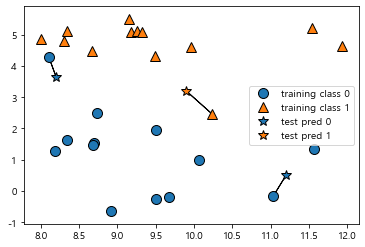

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\nayoung\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


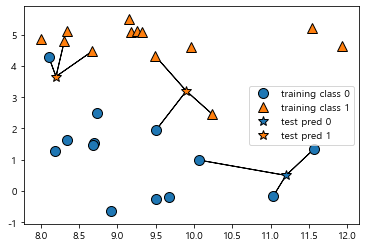

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

    n_neighbors으로 가장 가까운 이웃의 수를 선택할 수 있다. 위의 그림과 아래 그림에서 왼쪽 상단의 점은 예측값이 달라진 것을 알 수 있다.

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\nayoung\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [15]:
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
#테스트 세트 예측
print(format(clf.predict(x_test)))

[1 0 1 0 1 0 0]


In [17]:
#테스트 세트 정확도
print("{:.2f}".format(clf.score(x_test, y_test)))

0.86


  > #### KNeighborsClassifier 분석

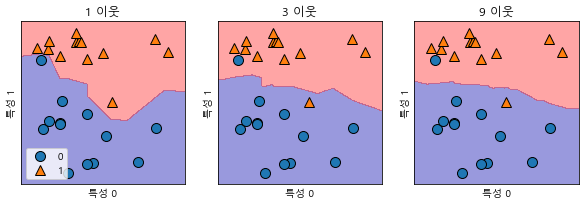

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

    이웃의 수를 늘릴수록 결정 경계는 더 부드러워진다. 부드러운 경계는 더 단순한 모델을 의미한다.    
    만약, 이웃의 수를 전체 데이터의 수로 정하면 모든 테스트 포인트가 같은 이웃이 되고, 훈련 데이터에서 가장 많은 포인트를 가진 클래스가 예측값이 된다.

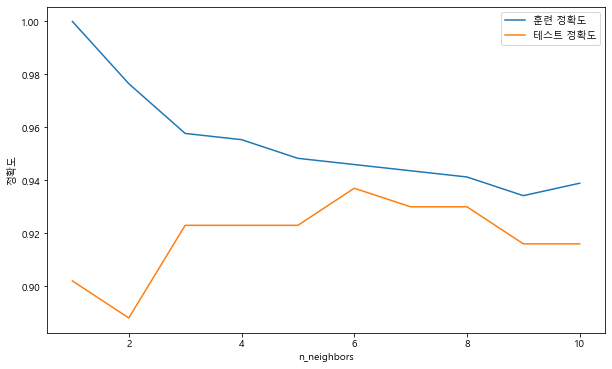

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,
                                                   random_state=66)
training_accuracy=[]
test_accuracy=[]

neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    training_accuracy.append(clf.score(x_train, y_train))
    test_accuracy.append(clf.score(x_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

  > #### k-최근접 이웃 회귀

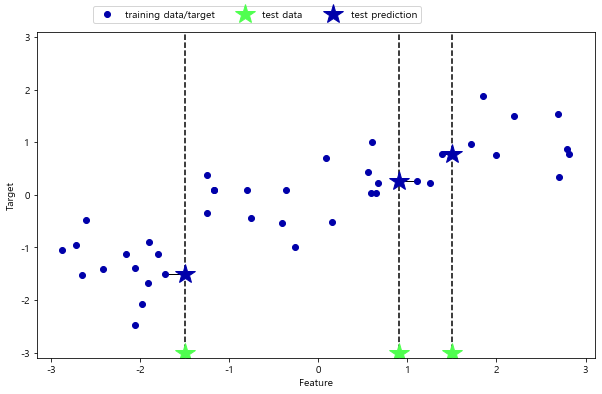

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

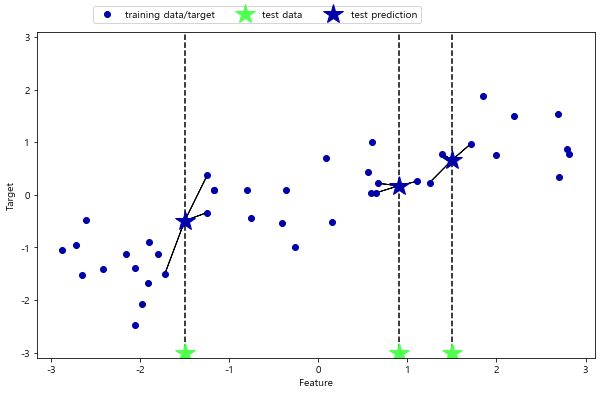

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3) #이웃의 수를 3으로 하여 모델의 객체를 만듦.
reg.fit(x_train, y_train) # 모델에 train data를 학습시킴.

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [23]:
print("테스트 세트 예측: \n{}".format(reg.predict(x_test)))

테스트 세트 예측: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [24]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(x_test,y_test)))

테스트 세트 R^2: 0.83


  > #### KNeighborsRegressor 분석

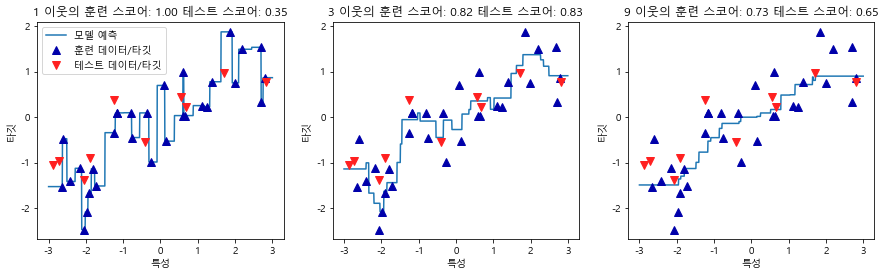

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

line = np.linspace(-3, 3, 1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(x_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(x_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(x_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
    "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
    n_neighbors, reg.score(x_train, y_train), reg.score(x_test,y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

> #### 요약    
* k-NN 모델은 빠르게 만들 수 있지만, train data가 매우 크면 느려지는 단점이 있다.   
* 많은 특성을 가진 데이터 셋에는 잘 동작하지 않고, 특성 값 대부분이 0인 데이터 셋과는 특히 잘 작동하지 않는다.   
* 예측이 느리고 많은 특성을 처리하는 능력이 부족해 현업에서는 잘 쓰지 않는다.